# 추가과제

## TIOBE INDEX 20위까지 확장해서 검색해보기

### 책 가격, 페이지수 함꼐 수집할 것

- 'Python', 'C', 'Java', 'C++', 'C#', 'Visual Basic', 'JavaScript', 'SQL', 'PHP', 'Assembly language', 
'Class Visual Basic', 'Go', 'MATLAB', 'R', 'Groovy', 'Ruby', 'Swift', 'Fortran', 'Perl', 'Delphi/Object Pascal'

In [9]:
# 필요한 모듈 import
import os
import sys
import json
import datetime
import platform
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
import ssl
from fake_useragent import UserAgent
from tqdm import tqdm_notebook
# API 요청  429 에러로 사용
import time

In [231]:
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print('Hangul OK in your Windows!!!')
    rc("font", family=font_name)
else:
    print('Unknown system. sorry!!~')

plt.rcParams["axes.unicode_minus"] = False

Hangul OK in your Windows!!!


In [4]:
# 네이버 API key
client_id = "RpCSsXQbjViP1An4myaR"
client_secret = "g1hzDn5hAk"

In [5]:
# 책 조회 url 생성 함수
def gen_search_url(search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search/book"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)

    return base + param_query + param_start + param_disp

In [49]:
# 해당 페이지로부터 정보 얻어오기
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now()) # log용 print
    return json.loads(response.read().decode('utf-8'))

```
Python, 파이썬
C programming, C 프로그래밍
Java, 자바
JavaScript, 자바스크립트
C++
C#
Visual Basic -> Visual Basic.NET
SQL
PHP programming, PHP 프로그래밍
Assembly language
Classic Visual Basic -> Visual Basic
Go -> Go programming, Go 프로그래밍
MATLAB
R programming, R 프로그래밍
Groovy programming, Groovy 프로그래밍
Ruby 프로그래밍, Ruby programming
Swift 프로그래밍, Swift programming
Fortran
Perl 프로그래밍, Perl programming
Delphi, Object Pascal
```

In [10]:
# test
url = gen_search_url("Python", 1, 3)
one_result = get_result_onpage(url)

[2021-10-21 00:55:17.243839] Url Request Success


In [12]:
one_result["items"][0].get("link")

'http://book.naver.com/bookdb/book_detail.php?bid=16876960'

In [22]:
# req = urllib.request.Request(one_result["items"][0].get("link"))
req = urllib.request.Request("https://book.naver.com/bookdb/book_detail.naver?bid=21014669")
response = urllib.request.urlopen(req)
soup = BeautifulSoup(response, "html.parser")
# print(soup.prettify())

In [24]:
soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text.split('|')

['\nISBN  9784569901640']

In [6]:
# 제목에 붙은 <b> 태그 지우기
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [32]:
# 데이터 프레임화 시키는 함수
def get_fields(keyword, json_data):
    keyword = [keyword] * len(json_data["items"])
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    publisher = [each["publisher"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]

    result_pd = pd.DataFrame({
        "keyword": keyword,
        "title": title,
        "publisher": publisher,
        "price": price,
        "pubdate": pubdate,
        "isbn": isbn,
        "link": link
    })

    return result_pd

In [26]:
# 함수 동작 test
test = get_fields("Python", one_result)
test.head()

,keyword,title,publisher,price,pubdate,isbn,page
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000,20201030,1165213192 9791165213190,640
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000,20201008,8956748578 9788956748573,310
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060,20211005,1680508237 9781680508239,130


In [30]:
search_list = ["파이썬", "C programming", "C 프로그래밍", "Java", "자바",
"JavaScript", "자바스크립트", "C++", "C#", "Visual Basic.NET", "SQL", "PHP programming",
"PHP 프로그래밍", "Assembly language", "Visual Basic", "Go programming", "Go 프로그래밍",
"MATLAB", "R programming", "R 프로그래밍", "Groovy programming", "Groovy 프로그래밍", "Ruby 프로그래밍",
"Ruby programming", "Swift programming", "Swift 프로그래밍", "Fortran", "Perl programming",
"Perl 프로그래밍", "Delphi", "Object Pascal"
]

In [33]:
# Python
result_book = []

for n in range(1, 1000, 100):
    url = gen_search_url("Python", n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields("Python", json_result)

    result_book.append(pd_result)

result_book = pd.concat(result_book)

[2021-10-21 01:45:11.382524] Url Request Success
[2021-10-21 01:45:11.745737] Url Request Success
[2021-10-21 01:45:12.154201] Url Request Success
[2021-10-21 01:45:12.552087] Url Request Success
[2021-10-21 01:45:12.956093] Url Request Success
[2021-10-21 01:45:13.346501] Url Request Success
[2021-10-21 01:45:13.723256] Url Request Success
[2021-10-21 01:45:14.127809] Url Request Success
[2021-10-21 01:45:14.518888] Url Request Success
[2021-10-21 01:45:14.903771] Url Request Success


In [34]:
result_book.head()

,keyword,title,publisher,price,pubdate,isbn,link
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000,20201008,8956748578 9788956748573,http://book.naver.com/bookdb/book_detail.php?b...
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060,20211005,1680508237 9781680508239,http://book.naver.com/bookdb/book_detail.php?b...
3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000,20210225,118557879X 9791185578798,http://book.naver.com/bookdb/book_detail.php?b...
4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730,20211019,1492056359 9781492056355,http://book.naver.com/bookdb/book_detail.php?b...


In [35]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    1000 non-null   object
 1   title      1000 non-null   object
 2   publisher  1000 non-null   object
 3   price      1000 non-null   object
 4   pubdate    1000 non-null   object
 5   isbn       1000 non-null   object
 6   link       1000 non-null   object
dtypes: object(7)
memory usage: 62.5+ KB


In [36]:
from tqdm import tqdm_notebook

for keyword in tqdm_notebook(search_list):
    tmp_result = []
    for n in range(1, 1000, 100):
        url = gen_search_url(keyword, n, 100)
        json_result = get_result_onpage(url)
        pd_result = get_fields(keyword, json_result)

        tmp_result.append(pd_result)

    tmp_result = pd.concat(tmp_result)

    tmp_result.reset_index(inplace=True)
    del tmp_result["index"]

    result_book = pd.concat([result_book, tmp_result])

C:\Users\sanghui\AppData\Local\Temp/ipykernel_17104/1979051933.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for keyword in tqdm_notebook(search_list):


  0%|          | 0/31 [00:00<?, ?it/s]

[2021-10-21 01:45:49.357504] Url Request Success
[2021-10-21 01:45:49.682034] Url Request Success
[2021-10-21 01:45:50.017764] Url Request Success
[2021-10-21 01:45:50.332897] Url Request Success
[2021-10-21 01:45:50.658895] Url Request Success
[2021-10-21 01:45:50.962817] Url Request Success
[2021-10-21 01:45:51.299876] Url Request Success
[2021-10-21 01:45:51.703310] Url Request Success
[2021-10-21 01:45:52.092176] Url Request Success
[2021-10-21 01:45:52.472760] Url Request Success
[2021-10-21 01:45:52.800831] Url Request Success
[2021-10-21 01:45:53.177708] Url Request Success
[2021-10-21 01:45:53.499313] Url Request Success
[2021-10-21 01:45:53.792631] Url Request Success
[2021-10-21 01:45:54.134535] Url Request Success
[2021-10-21 01:45:54.478541] Url Request Success
[2021-10-21 01:45:54.727982] Url Request Success
[2021-10-21 01:45:54.988338] Url Request Success
[2021-10-21 01:45:55.403165] Url Request Success
[2021-10-21 01:45:55.766082] Url Request Success
[2021-10-21 01:45:56

HTTPError: HTTP Error 429: Too Many Requests

In [52]:
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link
25,Groovy programming,Real-time Web Application Development with Vert.x,PacktPublishing,47980,20130810,1782167951 9781782167952,http://book.naver.com/bookdb/book_detail.php?b...
26,Groovy programming,The Thoughtworks Anthology (Paperback) (Essays...,Oreilly&AssociatesInc,46690,20080411,193435614X 9781934356142,http://book.naver.com/bookdb/book_detail.php?b...
27,Groovy programming,Learn Java for Web Development: Modern Java We...,Springer,66920,20131231,1430259833 9781430259831,http://book.naver.com/bookdb/book_detail.php?b...
28,Groovy programming,Introducing Spring Framework: A Primer (A Primer),Apress,66910,20140626,1430265329 9781430265320,http://book.naver.com/bookdb/book_detail.php?b...
29,Groovy programming,Agile Entwicklung Von Web-Anwendungen Mit Grails,GrinVerlag,28640,20130807,3640983750 9783640983759,http://book.naver.com/bookdb/book_detail.php?b...


In [53]:
# 에러 난 시점부터 삭제
result_book = result_book[result_book['keyword'] != 'Groovy programming']

In [54]:
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link
571,R 프로그래밍,9가지 사례로 익히는 고급 스파크 분석 (현실 세계 빅데이터로 배우는 가장 실용적인...,한빛미디어,26000,20160701,8968482896 9788968482892,http://book.naver.com/bookdb/book_detail.php?b...
572,R 프로그래밍,컴퓨터 과학개론 (컴퓨터 이해와 활용을 위한),21세기사,22000,20090225,8984682934 9788984682931,http://book.naver.com/bookdb/book_detail.php?b...
573,R 프로그래밍,"이것이 자바다 (JAVA 세상, JAVA 개발자로 가는길(무료 인터넷 강의, Q/A...",한빛미디어,30000,20150105,6000834225 9786000834227,http://book.naver.com/bookdb/book_detail.php?b...
574,R 프로그래밍,정보처리산업기사 실기 (e-런닝으로 확실하게 합격하는),성안당,20000,20070102,8931548990 9788931548990,http://book.naver.com/bookdb/book_detail.php?b...
575,R 프로그래밍,컴퓨터 활용과 인터넷,생능,16000,19970303,8970501258 9788970501253,http://book.naver.com/bookdb/book_detail.php?b...


In [55]:
tmp_list = search_list[-11:]
tmp_list

['Groovy programming',
 'Groovy 프로그래밍',
 'Ruby 프로그래밍',
 'Ruby programming',
 'Swift programming',
 'Swift 프로그래밍',
 'Fortran',
 'Perl programming',
 'Perl 프로그래밍',
 'Delphi',
 'Object Pascal']

In [56]:
# time sleep 건후 다시 시도
for keyword in tqdm_notebook(tmp_list):
    tmp_result = []
    for n in range(1, 1000, 100):
        url = gen_search_url(keyword, n, 100)
        time.sleep(1)
        json_result = get_result_onpage(url)
        time.sleep(2)
        pd_result = get_fields(keyword, json_result)

        tmp_result.append(pd_result)

    tmp_result = pd.concat(tmp_result)

    tmp_result.reset_index(inplace=True)
    del tmp_result["index"]

    result_book = pd.concat([result_book, tmp_result])

C:\Users\sanghui\AppData\Local\Temp/ipykernel_17104/4253321360.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for keyword in tqdm_notebook(tmp_list):


  0%|          | 0/11 [00:00<?, ?it/s]

[2021-10-21 02:02:45.702473] Url Request Success
[2021-10-21 02:02:48.800672] Url Request Success
[2021-10-21 02:02:51.891110] Url Request Success
[2021-10-21 02:02:54.986199] Url Request Success
[2021-10-21 02:02:58.084291] Url Request Success
[2021-10-21 02:03:01.189425] Url Request Success
[2021-10-21 02:03:04.276759] Url Request Success
[2021-10-21 02:03:07.376839] Url Request Success
[2021-10-21 02:03:10.475398] Url Request Success
[2021-10-21 02:03:13.564072] Url Request Success
[2021-10-21 02:03:16.680085] Url Request Success
[2021-10-21 02:03:19.849671] Url Request Success
[2021-10-21 02:03:22.935745] Url Request Success
[2021-10-21 02:03:26.037912] Url Request Success
[2021-10-21 02:03:29.141429] Url Request Success
[2021-10-21 02:03:32.239153] Url Request Success
[2021-10-21 02:03:35.324451] Url Request Success
[2021-10-21 02:03:38.411745] Url Request Success
[2021-10-21 02:03:41.509251] Url Request Success
[2021-10-21 02:03:44.782768] Url Request Success
[2021-10-21 02:03:48

In [57]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22191 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    22191 non-null  object
 1   title      22191 non-null  object
 2   publisher  22191 non-null  object
 3   price      22191 non-null  object
 4   pubdate    22191 non-null  object
 5   isbn       22191 non-null  object
 6   link       22191 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [58]:
# 인덱스 재설정
result_book.reset_index(inplace=True)
result_book.tail()

,index,keyword,title,publisher,price,pubdate,isbn,link
22186,170,Object Pascal,Jacques Lacan (Critical Evaluations in Cultura...,Routledge,2692360,20021200,0415278627 9780415278621,http://book.naver.com/bookdb/book_detail.php?b...
22187,171,Object Pascal,Digital Cognitive Technologies (Epistemology a...,Wiley-ISTE,245380,20130109,0470394234 9780470394236,http://book.naver.com/bookdb/book_detail.php?b...
22188,172,Object Pascal,You Can Program in C++ (A Programmer's Introdu...,Wiley,51300,20071210,0470295910 9780470295915,http://book.naver.com/bookdb/book_detail.php?b...
22189,173,Object Pascal,델파이 5.0,정익사,13000,20000801,8935302937 9788935302932,http://book.naver.com/bookdb/book_detail.php?b...
22190,174,Object Pascal,Microsoft Quickpascal Programming,Microsoft,20000,199000,1556152485 6101556152480,http://book.naver.com/bookdb/book_detail.php?b...


In [59]:
del result_book["index"]
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link
22186,Object Pascal,Jacques Lacan (Critical Evaluations in Cultura...,Routledge,2692360,20021200,0415278627 9780415278621,http://book.naver.com/bookdb/book_detail.php?b...
22187,Object Pascal,Digital Cognitive Technologies (Epistemology a...,Wiley-ISTE,245380,20130109,0470394234 9780470394236,http://book.naver.com/bookdb/book_detail.php?b...
22188,Object Pascal,You Can Program in C++ (A Programmer's Introdu...,Wiley,51300,20071210,0470295910 9780470295915,http://book.naver.com/bookdb/book_detail.php?b...
22189,Object Pascal,델파이 5.0,정익사,13000,20000801,8935302937 9788935302932,http://book.naver.com/bookdb/book_detail.php?b...
22190,Object Pascal,Microsoft Quickpascal Programming,Microsoft,20000,199000,1556152485 6101556152480,http://book.naver.com/bookdb/book_detail.php?b...


In [60]:
# 데이터 임시 저장
result_book.to_csv("./naver_book_raw_data2.csv", sep=",", encoding='utf-8')

---

## ISBN 넘버로 중복데이터 제거

In [61]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22191 entries, 0 to 22190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    22191 non-null  object
 1   title      22191 non-null  object
 2   publisher  22191 non-null  object
 3   price      22191 non-null  object
 4   pubdate    22191 non-null  object
 5   isbn       22191 non-null  object
 6   link       22191 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [62]:
len(result_book['isbn'].unique())

18967

In [63]:
result_book = result_book.drop_duplicates(['isbn'])

In [64]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 0 to 22190
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keyword    18967 non-null  object
 1   title      18967 non-null  object
 2   publisher  18967 non-null  object
 3   price      18967 non-null  object
 4   pubdate    18967 non-null  object
 5   isbn       18967 non-null  object
 6   link       18967 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [65]:
result_book.to_csv("./isbn_filter2.csv", sep=",", encoding="utf-8")

### 두번 검색한 keyword 정리

In [66]:
result_book.loc[result_book["keyword"]=="파이썬", "keyword"] = "Python"
result_book.loc[result_book["keyword"]=="C programming", "keyword"] = "C"
result_book.loc[result_book["keyword"]=="C 프로그래밍", "keyword"] = "C"
result_book.loc[result_book["keyword"]=="자바", "keyword"] = "Java"
result_book.loc[result_book["keyword"]=="자바스크립트", "keyword"] = "JavaScript"
result_book.loc[result_book["keyword"]=="Visual Basic", "keyword"] = "Classic Visual Basic"
result_book.loc[result_book["keyword"]=="Visual Basic.NET", "keyword"] = "Visual Basic"
result_book.loc[result_book["keyword"]=="PHP programming", "keyword"] = "PHP"
result_book.loc[result_book["keyword"]=="PHP 프로그래밍", "keyword"] = "PHP"
result_book.loc[result_book["keyword"]=="Go programming", "keyword"] = "Go"
result_book.loc[result_book["keyword"]=="Go 프로그래밍", "keyword"] = "Go"
result_book.loc[result_book["keyword"]=="R programming", "keyword"] = "R"
result_book.loc[result_book["keyword"]=="R 프로그래밍", "keyword"] = "R"
result_book.loc[result_book["keyword"]=="Groovy programming", "keyword"] = "Groovy"
result_book.loc[result_book["keyword"]=="Groovy 프로그래밍", "keyword"] = "Groovy"
result_book.loc[result_book["keyword"]=="Ruby programming", "keyword"] = "Ruby"
result_book.loc[result_book["keyword"]=="Ruby 프로그래밍", "keyword"] = "Ruby"
result_book.loc[result_book["keyword"]=="Swift 프로그래밍", "keyword"] = "Swift"
result_book.loc[result_book["keyword"]=="Swift programming", "keyword"] = "Swift"
result_book.loc[result_book["keyword"]=="Delphi", "keyword"] = "Delphi/Object Pascal"
result_book.loc[result_book["keyword"]=="Object Pascal", "keyword"] = "Delphi/Object Pascal"
result_book.loc[result_book["keyword"]=="Perl programming", "keyword"] = "Perl"
result_book.loc[result_book["keyword"]=="Perl 프로그래밍", "keyword"] = "Perl"



In [67]:
# test
result_book[result_book['keyword'] == "Ruby 프로그래밍"]

,keyword,title,publisher,price,pubdate,isbn,link


In [68]:
# 임시 저장
result_book.to_csv("./book_keyword2.csv", sep=",", encoding="utf-8")

---

## 페이지 정보 가져오기

In [35]:
result_book = pd.read_csv("./book_keyword2.csv", index_col=0)

In [36]:
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link
22186,Delphi/Object Pascal,Jacques Lacan (Critical Evaluations in Cultura...,Routledge,2692360.0,20021200,0415278627 9780415278621,http://book.naver.com/bookdb/book_detail.php?b...
22187,Delphi/Object Pascal,Digital Cognitive Technologies (Epistemology a...,Wiley-ISTE,245380.0,20130109,0470394234 9780470394236,http://book.naver.com/bookdb/book_detail.php?b...
22188,Delphi/Object Pascal,You Can Program in C++ (A Programmer's Introdu...,Wiley,51300.0,20071210,0470295910 9780470295915,http://book.naver.com/bookdb/book_detail.php?b...
22189,Delphi/Object Pascal,델파이 5.0,정익사,13000.0,20000801,8935302937 9788935302932,http://book.naver.com/bookdb/book_detail.php?b...
22190,Delphi/Object Pascal,Microsoft Quickpascal Programming,Microsoft,20000.0,199000,1556152485 6101556152480,http://book.naver.com/bookdb/book_detail.php?b...


In [16]:
#페이지 정보 가져오기
ua = UserAgent()
page = []
for idx, row in tqdm_notebook(result_book[:10000].iterrows()):
   context = ssl._create_unverified_context()
   url = row['link']
   req = urllib.request.Request(url, headers={"User-Agent": ua.ie})
   response = urllib.request.urlopen(req, context=context)
   soup = BeautifulSoup(response, "html.parser")
   try:
      info = soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text
      split_list = info.split('|') if len(info) != 0 else []
      if len(split_list) == 2:
         page.append(split_list[0][-3:])
      else:
         page.append(np.nan)
   except:
            page.append(np.nan)

C:\Users\sanghui\AppData\Local\Temp/ipykernel_13572/1608432761.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, row in tqdm_notebook(result_book[:10000].iterrows()):


0it [00:00, ?it/s]

In [18]:
page = page[:10000]

In [20]:
len(page)

10000

In [21]:
#페이지 정보 가져오기 - 2
time.sleep(3)
for idx, row in tqdm_notebook(result_book[10000:20000].iterrows()):
   context = ssl._create_unverified_context()
   url = row['link']
   try:
      req = urllib.request.Request(url, headers={"User-Agent": ua.ie})
      response = urllib.request.urlopen(req, context=context)
      soup = BeautifulSoup(response, "html.parser")
      info = soup.select_one('#container > div.spot > div.book_info > div.book_info_inner > div:nth-child(3)').text
      split_list = info.split('|') if len(info) != 0 else []
      if len(split_list) == 2:
         page.append(split_list[0][-3:])
      else:
         page.append(np.nan)
   except:
            page.append(np.nan)

C:\Users\sanghui\AppData\Local\Temp/ipykernel_13572/2368212584.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, row in tqdm_notebook(result_book[10000:20000].iterrows()):


0it [00:00, ?it/s]

In [22]:
len(page)

18967

In [34]:
for idx, item in enumerate(page):
    try:
        item = int(item)
    except:
        item = np.nan

In [37]:
result_book["page"] = page

In [38]:
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link,page
22186,Delphi/Object Pascal,Jacques Lacan (Critical Evaluations in Cultura...,Routledge,2692360.0,20021200,0415278627 9780415278621,http://book.naver.com/bookdb/book_detail.php?b...,600
22187,Delphi/Object Pascal,Digital Cognitive Technologies (Epistemology a...,Wiley-ISTE,245380.0,20130109,0470394234 9780470394236,http://book.naver.com/bookdb/book_detail.php?b...,416
22188,Delphi/Object Pascal,You Can Program in C++ (A Programmer's Introdu...,Wiley,51300.0,20071210,0470295910 9780470295915,http://book.naver.com/bookdb/book_detail.php?b...,388
22189,Delphi/Object Pascal,델파이 5.0,정익사,13000.0,20000801,8935302937 9788935302932,http://book.naver.com/bookdb/book_detail.php?b...,374
22190,Delphi/Object Pascal,Microsoft Quickpascal Programming,Microsoft,20000.0,199000,1556152485 6101556152480,http://book.naver.com/bookdb/book_detail.php?b...,NaN


In [26]:
result_book.head()

,keyword,title,publisher,price,pubdate,isbn,link,page
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...,640
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000.0,20201008,8956748578 9788956748573,http://book.naver.com/bookdb/book_detail.php?b...,310
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060.0,20211005,1680508237 9781680508239,http://book.naver.com/bookdb/book_detail.php?b...,130
3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000.0,20210225,118557879X 9791185578798,http://book.naver.com/bookdb/book_detail.php?b...,368
4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730.0,20211019,1492056359 9781492056355,http://book.naver.com/bookdb/book_detail.php?b...,850


- page수 nan값 filtering

In [39]:
len(result_book)

18967

In [40]:
result_book = result_book[result_book["page"].notna()]

In [41]:
len(result_book)

11290

In [42]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11290 entries, 0 to 22189
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11290 non-null  object 
 1   title      11290 non-null  object 
 2   publisher  11290 non-null  object 
 3   price      11268 non-null  float64
 4   pubdate    11290 non-null  object 
 5   isbn       11290 non-null  object 
 6   link       11290 non-null  object 
 7   page       11290 non-null  object 
dtypes: float64(1), object(7)
memory usage: 793.8+ KB


In [44]:
# 임시 저장
result_book.to_csv("./page_price2.csv", sep=",", encoding='utf-8')

In [153]:
result_book = pd.read_csv('./page_price2.csv', index_col=0)
result_book.head(1)

,keyword,title,publisher,price,pubdate,isbn,link,page
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...,640


- page수 int형으로 변환

In [157]:
result_book = result_book[result_book['page'] != '지 8']

In [158]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11283 entries, 0 to 22189
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11283 non-null  object 
 1   title      11283 non-null  object 
 2   publisher  11283 non-null  object 
 3   price      11261 non-null  float64
 4   pubdate    11283 non-null  object 
 5   isbn       11283 non-null  object 
 6   link       11283 non-null  object 
 7   page       11283 non-null  object 
dtypes: float64(1), object(7)
memory usage: 793.3+ KB


In [159]:
result_book = result_book.astype({'page': 'int'})

In [160]:
result_book.to_csv("./filter_data3.csv", sep=",", encoding="utf-8")

In [161]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11283 entries, 0 to 22189
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11283 non-null  object 
 1   title      11283 non-null  object 
 2   publisher  11283 non-null  object 
 3   price      11261 non-null  float64
 4   pubdate    11283 non-null  object 
 5   isbn       11283 non-null  object 
 6   link       11283 non-null  object 
 7   page       11283 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 749.3+ KB


---

## 언어별 책의 페이지수

In [162]:
result_book.tail()

,keyword,title,publisher,price,pubdate,isbn,link,page
22184,Delphi/Object Pascal,Design and Implementation of Concurrent Smallt...,WorldScientificPubCoInc,83300.0,20071018,9810201125 9789810201128,http://book.naver.com/bookdb/book_detail.php?b...,153
22186,Delphi/Object Pascal,Jacques Lacan (Critical Evaluations in Cultura...,Routledge,2692360.0,20021200,0415278627 9780415278621,http://book.naver.com/bookdb/book_detail.php?b...,600
22187,Delphi/Object Pascal,Digital Cognitive Technologies (Epistemology a...,Wiley-ISTE,245380.0,20130109,0470394234 9780470394236,http://book.naver.com/bookdb/book_detail.php?b...,416
22188,Delphi/Object Pascal,You Can Program in C++ (A Programmer's Introdu...,Wiley,51300.0,20071210,0470295910 9780470295915,http://book.naver.com/bookdb/book_detail.php?b...,388
22189,Delphi/Object Pascal,델파이 5.0,정익사,13000.0,20000801,8935302937 9788935302932,http://book.naver.com/bookdb/book_detail.php?b...,374


In [163]:
result_book.reset_index(inplace=True)
result_book.head()

,index,keyword,title,publisher,price,pubdate,isbn,link,page
0,0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...,640
1,1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000.0,20201008,8956748578 9788956748573,http://book.naver.com/bookdb/book_detail.php?b...,310
2,2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060.0,20211005,1680508237 9781680508239,http://book.naver.com/bookdb/book_detail.php?b...,130
3,3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000.0,20210225,118557879X 9791185578798,http://book.naver.com/bookdb/book_detail.php?b...,368
4,4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730.0,20211019,1492056359 9781492056355,http://book.naver.com/bookdb/book_detail.php?b...,850


In [164]:
del result_book['index']

In [165]:
page_pivot = pd.pivot_table(result_book, index='keyword', values='page', aggfunc='mean')
page_pivot

,page
keyword,
Assembly language,393.315186
C,364.162901
C#,495.938806
C++,444.447115
Classic Visual Basic,480.514377
Delphi/Object Pascal,284.211405
Fortran,349.373239
Go,330.120120
Groovy,290.625000


In [166]:
page_pivot.sort_values(by='page')

,page
keyword,
Python,280.710825
Delphi/Object Pascal,284.211405
Groovy,290.625000
Go,330.120120
MATLAB,344.164306
Fortran,349.373239
Ruby,361.915493
C,364.162901
Swift,368.248276


```
위의 표를 보면 언어별 책 페이지수의 평균을 보여준다. 예상외로 파이썬도서 페이지가 제일 작게 나왓고, C++을 제외한 상대적으로 비주류 언어들에 대한 책 페이지수가 많이 나오는것으로 보인다.
```

In [167]:
page_pivot.reset_index(inplace=True)
page_pivot.head()

,keyword,page
0,Assembly language,393.315186
1,C,364.162901
2,C#,495.938806
3,C++,444.447115
4,Classic Visual Basic,480.514377


In [234]:
page_pivot =page_pivot.sort_values(by="page")

No handles with labels found to put in legend.


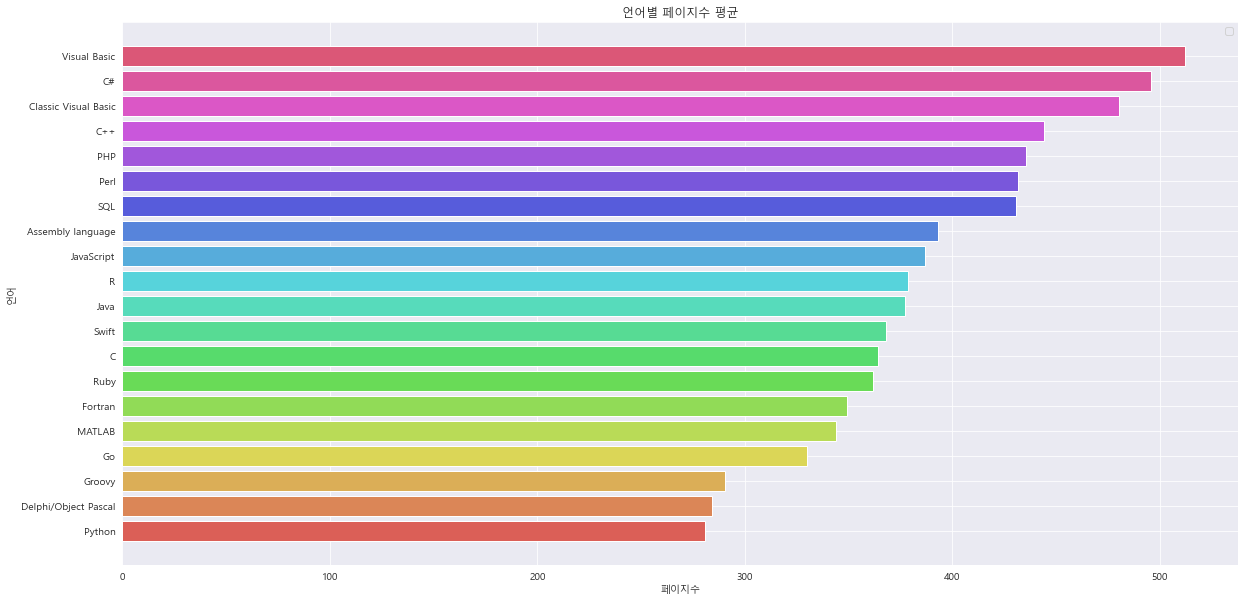

In [235]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls', len(page_pivot["keyword"]))
plt.barh(page_pivot["keyword"], page_pivot["page"], color=colors)
plt.legend()
plt.grid(True)
plt.title('언어별 페이지수 평균')
plt.xlabel("페이지수")
plt.ylabel("언어")
plt.show()

- 위 차트를 보게되면 상대적으로 비 인기 언어들의 도서 페이지수가 평균적으로 더 많은것으로 보인다. 하지만 상대적으로 인기가 제일 많은 파이썬이 페이지수가 가장 적은점이 눈에 띈다.

---

## 언어별 책의 가격

In [171]:
result_book.head()

,keyword,title,publisher,price,pubdate,isbn,link,page
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...,640
1,Python,파이썬 딥러닝 파이토치(Python Deep Learning PyTorch),정보문화사,25000.0,20201008,8956748578 9788956748573,http://book.naver.com/bookdb/book_detail.php?b...,310
2,Python,Intuitive Python: Productive Development for P...,PragmaticBookshelf,38060.0,20211005,1680508237 9781680508239,http://book.naver.com/bookdb/book_detail.php?b...,130
3,Python,Python으로 시작하는 빅데이터분석 및 인공지능 (개정판),인피니티북스,26000.0,20210225,118557879X 9791185578798,http://book.naver.com/bookdb/book_detail.php?b...,368
4,Python,"Fluent Python: Clear, Concise, and Effective P...",O'ReillyMedia,99730.0,20211019,1492056359 9781492056355,http://book.naver.com/bookdb/book_detail.php?b...,850


In [172]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11283 entries, 0 to 11282
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11283 non-null  object 
 1   title      11283 non-null  object 
 2   publisher  11283 non-null  object 
 3   price      11261 non-null  float64
 4   pubdate    11283 non-null  object 
 5   isbn       11283 non-null  object 
 6   link       11283 non-null  object 
 7   page       11283 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 661.2+ KB


- price 값 nan 처리 한번 다시하기

In [173]:
result_book = result_book[result_book["price"].notna()]

In [174]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11261 entries, 0 to 11282
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11261 non-null  object 
 1   title      11261 non-null  object 
 2   publisher  11261 non-null  object 
 3   price      11261 non-null  float64
 4   pubdate    11261 non-null  object 
 5   isbn       11261 non-null  object 
 6   link       11261 non-null  object 
 7   page       11261 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 747.8+ KB


In [175]:
price_pivot = pd.pivot_table(result_book, index='keyword', values='price', aggfunc='mean')
price_pivot

,price
keyword,
Assembly language,86861.499281
C,58354.480334
C#,60812.873134
C++,63899.125000
Classic Visual Basic,69191.760383
Delphi/Object Pascal,70779.546853
Fortran,82702.540780
Go,53141.692192
Groovy,49757.083333


In [176]:
price_pivot = price_pivot.sort_values(by="price")
price_pivot

,price
keyword,
Python,47321.710825
JavaScript,49006.427663
Groovy,49757.083333
Ruby,50386.690141
PHP,52144.284211
Swift,52169.103448
Java,52770.133721
Go,53141.692192
C,58354.480334


```
위의 테이블은 언어별 도서 가격의 평균값이다. 대체로 저렴한 경우가 평균 47000원 부근이고 비싼 도서는 10만원이 훌쩍 넘는값이었다.
이유를 원본 데이터 안에서 찾아보니 외국 도서는 가격이 꾀 나가는 경우가 있었고, 또한 세트 도서로 묶여 있는 경우도 10만원 이상 가격이 나가는 양상이 보였다.
```

In [177]:
price_pivot.reset_index(inplace=True)
price_pivot.head()

,keyword,price
0,Python,47321.710825
1,JavaScript,49006.427663
2,Groovy,49757.083333
3,Ruby,50386.690141
4,PHP,52144.284211


No handles with labels found to put in legend.


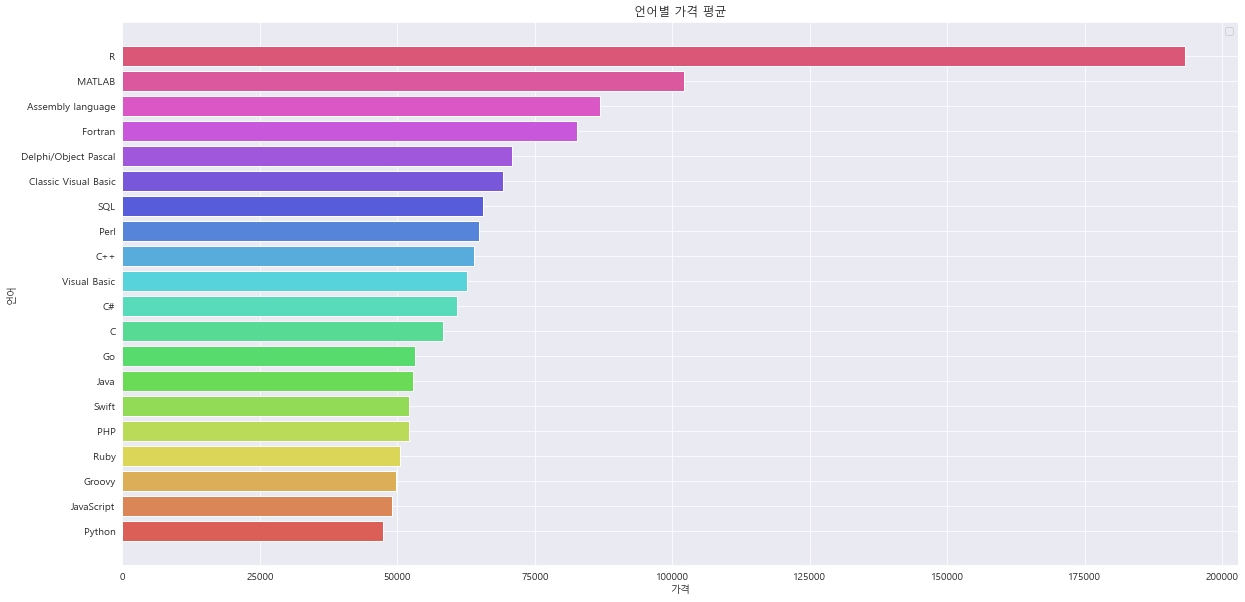

In [178]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('hls', len(price_pivot["keyword"]))
plt.barh(price_pivot["keyword"], price_pivot["price"], color=colors)
plt.legend()
plt.grid(True)
plt.title('언어별 가격 평균')
plt.xlabel("가격")
plt.ylabel("언어")
plt.show()

- 차트를 보게되면 유독 R의 도서 가격이 비싸게 잡혓고, 눈에 띄는건 파이썬은 도서 페이지수도 작고 책의 가격도 저렴한 편인것으로 나타난다.

In [179]:
result_book.to_csv("./filter_data4.csv", sep=",", encoding="utf-8")

---

## 페이지 수와 가격 사이의 관계 살펴보기

In [211]:
result_book = pd.read_csv('./filter_data4.csv', index_col=0)
result_book.head(1)

,keyword,title,publisher,price,pubdate,isbn,link,page
0,Python,Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...,길벗,32000.0,20201030,1165213192 9791165213190,http://book.naver.com/bookdb/book_detail.php?b...,640


In [212]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11261 entries, 0 to 11282
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   keyword    11261 non-null  object 
 1   title      11261 non-null  object 
 2   publisher  11261 non-null  object 
 3   price      11261 non-null  float64
 4   pubdate    11261 non-null  object 
 5   isbn       11261 non-null  object 
 6   link       11261 non-null  object 
 7   page       11261 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 791.8+ KB


In [213]:
result_book.corr()

,price,page
price,1.000000,0.021315
page,0.021315,1.000000


- corr() 함수를 통해 상관관계가 있나 살펴봣을떈 0.02정도의 결과로 보아 0.2이하 이므로 거의 무시해도 될 수준의 상관관계를 갖고 있음을 알 수 있다.
그렇다면 산점도 그래프를 통해 다시한번 결과를 확인해보자

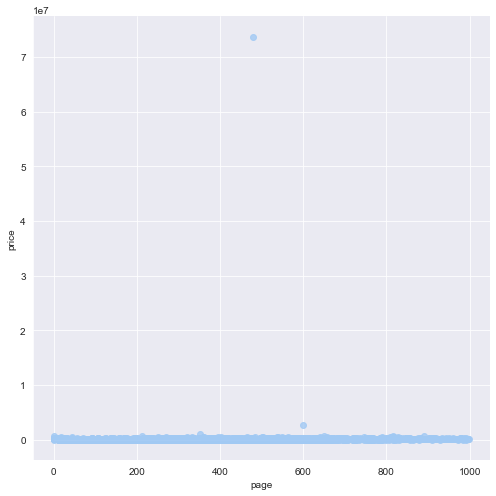

In [214]:
sns.set_style("darkgrid")
sns.lmplot(x="page", y="price", data=result_book, height=7)
plt.show()

```
위 데이터로는 페이지와 가격 사이에 데이터 분포를 확인하기 힘들어 보인다. 또한 상관관계 또한 찾기 힘들어 보인다. 데이터의 노이즈를 제거한 후 다시 한번 확인해 보도록 하자.
```

In [218]:
result_book["price/page"] = result_book["price"] / result_book["page"]

In [216]:
result_book["price/page"].max()

inf

- 무한대로 나왓다는건 페이지의 값이 0일 확률이 크다. 따라서 페이지가 0인 데이터를 한번 지우도록 해보자

In [187]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11261 entries, 0 to 11282
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   keyword     11261 non-null  object 
 1   title       11261 non-null  object 
 2   publisher   11261 non-null  object 
 3   price       11261 non-null  float64
 4   pubdate     11261 non-null  object 
 5   isbn        11261 non-null  object 
 6   link        11261 non-null  object 
 7   page        11261 non-null  int64  
 8   price/page  11261 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 879.8+ KB


In [217]:
result_book = result_book[result_book["page"] != 0]

In [219]:
result_book["price/page"].max()

153624.79166666666

- 이제는 수치값이 다시 나오므로 다시한번 데이터를 확인해본다.

In [220]:
# 노이즈값 제거
result_book = result_book[result_book["price/page"] < result_book["price/page"].max()]

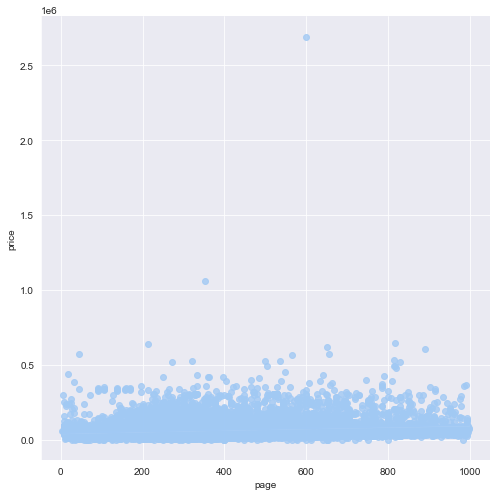

In [221]:
sns.set_style("darkgrid")
sns.lmplot(x="page", y="price", data=result_book, height=7)
plt.show()

- 대부분의 자료가 0.5 * 1e6 밑에 있으므로 저 밑에 구간의 데이터들의 상관관계를 살펴본다.

In [222]:
result_book = result_book[result_book["price/page"] < 500000.0]

In [196]:
0.5*1.e6

500000.0

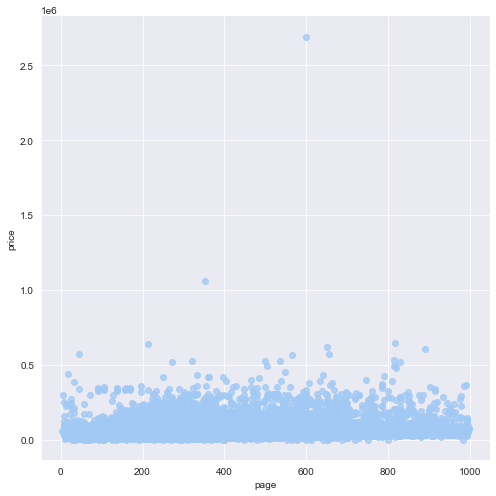

In [223]:
sns.set_style("darkgrid")
sns.lmplot(x="page", y="price", data=result_book, height=7)
plt.show()

- 번위를 더 줄여본다.

In [204]:
result_book["price/page"].mean()

255.63387934817604

In [224]:
result_book = result_book[result_book["price/page"] < 1000]

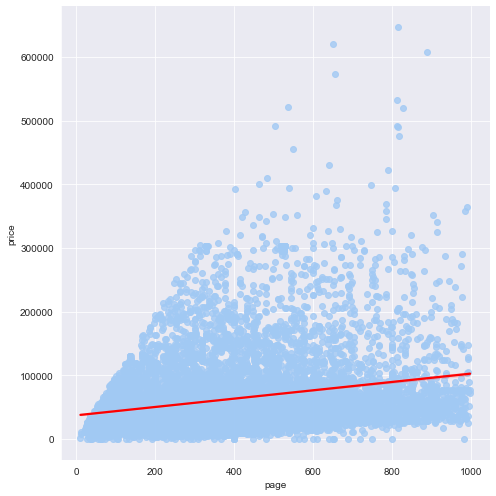

In [226]:
sns.set_style("darkgrid")
sns.lmplot(x="page", y="price", data=result_book, height=7, line_kws={'color': 'red'})
plt.show()

- 평균 근처까지 줄인 경우

In [227]:
result_book = result_book[result_book["price/page"] < 255]

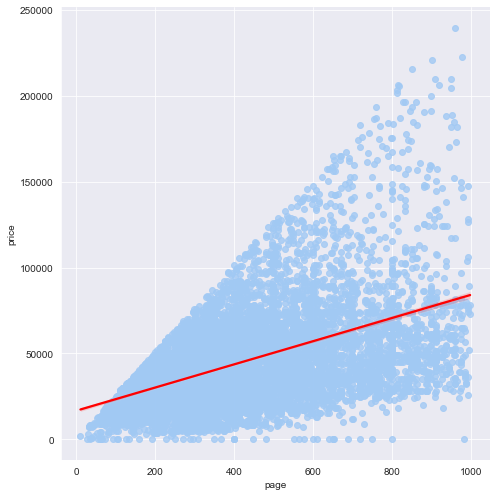

In [228]:
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.lmplot(x="page", y="price", data=result_book, height=7, line_kws={'color': 'red'})
plt.show()

```
page당 price 가격의 평균은 255원이었다. 
따라서 이값 부근으로 데이터의 범위를 줄일수록(평균 부근에 있는데이터들 실제로 page당 price의 가격이 1000원 까지 가는것도 현실적으론 힘들다. => 노이즈값이라 볼 수 있다.) 
page가 많아질수록 price가 많아지는 상관관계를 찾아낼 수 있었다.
전체 raw data에서 가격과 페이지수의 상관관계는 거의 없다 봐도 무방하지만
데이터의 범위를 줄이면서 노이즈 값들을 제거하게 되면 거의 y < x에 가까워 지는 상관관계를 찾을수 있을것 처럼 보인다.
```